**1. Khởi tạo dataframe**
Đây là cách thường ít được áp dụng vì khi làm việc chúng ta thường đọc dữ liệu từ những file dữ liệu có sẵn được lưu dưới dạng csv hoặc txt. Nhưng đôi khi chúng ta cũng cần khởi tạo dataframe từ đầu chẳng hạn như khi ta muốn lưu kết quả log file của chương trình vào một dataframe và save dưới dạng csv sau đó. Việc lưu trữ dưới dạng dataframe sẽ giúp cho chúng ta dễ dàng thực hiện các phép lọc, thống kê và visualize trực tiếp từ dataframe một cách dễ dàng hơn.
- Chúng ta khởi tạo bảng bằng cách đọc file csv (hoặc các dạng txt, xls, xlsx, dat) thông qua hàm pd.read_csv(). Hàm này không chỉ đọc được những file có trên máy tính mà còn có thể download những file có trên mạng.
- Hàm df.head() mặc định sẽ hiển thị ra 5 quan sát đầu tiên của dataframe. Chúng ta muốn hiển thị 5 quan sát cuối cùng thì dùng hàm df.tail() và 5 quan sát ngẫu nhiên thì dùng hàm df.sample(5).
- Hàm df.info() sẽ cho ta biết định dạng và số lượng quan sát not-null của mỗi trường trong dataframe.
- Hoặc chúng ta có thể dùng hàm df.dtypes để kiểm tra định dạng dữ liệu các trường của một bảng.
- Nếu muốn kiểm tra chi tiết hơn những thống kê mô tả của dataframe như trung bình, phương sai, min, max, median của một trường dữ liệu chúng ta dùng hàm df.describe()

In [29]:
import pandas as pd
Pet_df = pd.read_csv('train_Pet.csv')
Pet_df.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,1,2,2,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,2,3,3,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1,Brisco,1,307,0,1,2,7,0,2,2,1,1,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3
3,1,Miko,4,307,0,2,1,2,0,2,1,1,1,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8,2
4,1,Hunter,1,307,0,1,1,0,0,2,1,2,2,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3,2


- Để lưu trữ một dataframe dưới dạng một file csv ta dùng hàm **.to_csv()** tham số truyền vào là đường link save file. Dưới đây, ta lưu dataframe vào một file “data.csv” cùng thư mục với file notebook.

In [30]:
Pet_df.to_csv('Pet_data.csv', index=False)

- Cập nhật pip hiện thời lên phiên bản mới nhất

In [13]:
pip install --upgrade pip


  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


**NHỮNG THƯ VIỆN DÙNG CHO LNP VÀ Ý NGHĨA TỪNG CÂU LỆNH**

In [51]:
#libraries
'''!pip install wordcloud
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import wordcloud
import glob
from scipy import stats'''
!pip install wordcloud
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import wordcloud
from PIL import Image
import glob
from wordcloud import WordCloud


**WORDCLOUD**

Ngày nay, Chúng ta thường thấy cụm từ "wordcloud" xuất hiện trên các bài báo, công cụ tìm kiếm, thể hiện những từ khóa được tìm kiếm nhiều nhất hoặc là chủ đề của một nội dung nào đó.
- Đám mây từ khóa (wordcloud) hoặc đám mây thẻ (tag cloud) là biểu diễn dưới dạng đồ họa của tần suất xuất hiện của các từ, qua đó làm nổi bật các từ xuất hiện thường xuyên hơn trong (các) văn bản gốc. Từ trong hình ảnh càng lớn thì từ đó càng phổ biến và có ý nghĩa quan trọng.
- Để tạo được một đám mây từ khóa ta phải tìm kiếm các từ có tần suất xuất hiện lớn nhất trong đoạn văn. Để làm được điều này, ta cần phải thực hiện một bước đó là tokenization (tách từ).
- Tách từ là một quá trình xử lý nhằm mục đích xác định ranh giới của các từ trong câu văn, cũng có thể hiểu đơn giản rằng tách từ là quá trình xác định các từ đơn, từ ghép… có trong câu. Đối với xử lý ngôn ngữ, để có thể xác định cấu trúc ngữ pháp của câu, xác định từ loại của một từ trong câu, yêu cầu nhất thiết đặt ra là phải xác định được đâu là từ trong câu. Vấn đề này tưởng chừng đơn giản với con người nhưng đối với máy tính, đây là bài toán rất khó giải quyết.
- Sau khi thực hiện tokenization, spaCy có thể giúp thực hiện việc gán nhãn từ loại (pos-tagging), dùng mô hình ngôn ngữ để gán nhãn cho token theo bối cảnh của từng câu.
- SpaCy là một thư viện Python mã nguồn mở, miễn phí dùng để xử lý ngôn ngữ tự nhiên (Natural Language Processing – NLP). spaCy cung cấp nhiều mô hình mạng thần kinh để xử lý ngôn ngữ và nhận dạng thực thể tên, tách từ ở nhiều ngôn ngữ khác nhau, trong đó có cả tiếng Việt.

**TỔNG QUAN VỀ DỰ ÁN**
Hàng triệu con vật đi lạc gặp nạn trên đường phố hoặc bị giết trong những nơi trú ẩn mỗi ngày trên khắp thế giới. Nếu có thể tìm thấy nhà cho chúng, nhiều mạng sống quý giá có thể được cứu và đem lại niềm vui, hạnh phúc cho nhiều gia đình của những người yêu thương động vật.
Trong Dự án này, nhóm sẽ khám phá về việc nhận nuôi thú cưng.

**MỤC TIÊU CỦA DỰ ÁN**
Khám phá thông tin có giá trị:
- Xem xét, đánh giá và chọn lọc đặc điểm, yếu tố khiến vật nuôi có nhiều khả năng được nhận nuôi hơn; tìm các biến quan trọng nhất ảnh hưởng đến Tốc độ nhận nuôi.
- Hoàn thiện và ứng dụng vào thực tế với nguồn dữ liệu cứu hộ động vật tại Việt Nam để từ đó cung cấp mô hình gợi ý cho các Trung tâm Cứu hộ động vật tại Việt Nam.
- Tìm hiểu các kỹ thuật mới để trực quan hóa dữ liệu, làm sạch dữ liệu, mô hình ML, thử NLP lần đầu tiên và quan trọng nhất là vui chơi
- Sử dụng các hình ảnh với CNN để trích xuất các tính năng.
- Sử dụng Cột Mô tả để trích xuất ý kiến và làm việc với các kỹ thuật NLP
- Tập hợp tất cả các mô hình để cải thiện kết quả thử nghiệm.
- Tìm hiểu sâu hơn về tập dữ liệu và thu thập thêm thông tin chi tiết từ Dữ liệu dạng bảng, Hình ảnh, Cột Mô tả. Đặc biệt, tìm hiểu sâu về dữ liệu tại cột Mô tả để xem xét, đánh giá và lựa chọn những từ có hiệu quả đối với mô hình.
- Thử chạy với nhiều mô hình khác nhau để lựa chọn mô hình tốt nhất
**- Ghép giữa CV và LNP????

**TỔNG QUAN VỀ CÁC CỘT DỮ LIỆU (FEATURES)**
- Bộ dữ liệu gồm hai loại động vật là Chó = 1 và Mèo = 2 được biểu thị tại cột "Type" và tên tương ứng của mỗi con vật tại cột "Name"
- Mỗi con vật đều có thông tin về mô tả về ngoại hình gồm: Age, Breed, Gender, Color, FurLength và MaturitySize.
- Có một số cột liên quan đến tình trạng sức khỏe của vật nuôi: Vaccinated, Dewormed, Sterilized and general Health condtion(Healthy, Minor Injury, Serious Injury) - Đã tiêm phòng, tẩy giun, khử trùng và tình trạng sức khỏe chung (Khỏe mạnh, Thương tật nhẹ, Thương tích nghiêm trọng).
- Phí và thông tin về địa phương: Một số vật nuôi có Phí bắt buộc để nhận nuôi, chúng ta cũng có thể xem một số thông tin địa phương như Bang nơi vật nuôi ở, RescuerID là ID duy nhất của người đã giải cứu vật nuôi.
- Một số vật nuôi được gắn thẻ cùng với một số Hình ảnh và thậm chí cả Video! Chúng tôi sẽ có thể tận dụng điều đó và sử dụng chúng với một số Mô hình Thị giác Máy tính.
- Trường Description: mô tả về con vật.

**TỐC ĐỘ NHẬN NUÔI**

Tốc độ nhận nuôi là cột thể hiện con vật có được nhận nuôi hay không và tốc độ nhận nuôi như thế nào.
Bất cứ khi nào con vật được liệt kê trong trang web 'PetFinder.my', PetFinder sẽ theo dõi thời gian đã trôi qua cho đến khi ai đó nhận nuôi.
Các giá trị của cột tốc độ nhận nuôi được phân loại thành 5 mức:
0 - Con vật được nhận vào cùng ngày khi thông tin về nó được niêm yết.
1 - Con vật được nhận nuôi từ 1 đến 7 ngày (tuần đầu tiên) sau khi thông tin về nó được niêm yết.
2 - Con vật được nhận nuôi từ 8 đến 30 ngày (tháng đầu tiên) sau khi thông tin về nó được niêm yết.
3 - Con vật được nhận nuôi từ 31 đến 90 ngày (tháng thứ 2 & 3) sau khi thông tin về nó được niêm yết.
4 - Con vật không được nhận nuôi sau 100 ngày kể từ khi thông tin về nó được niêm yết. 

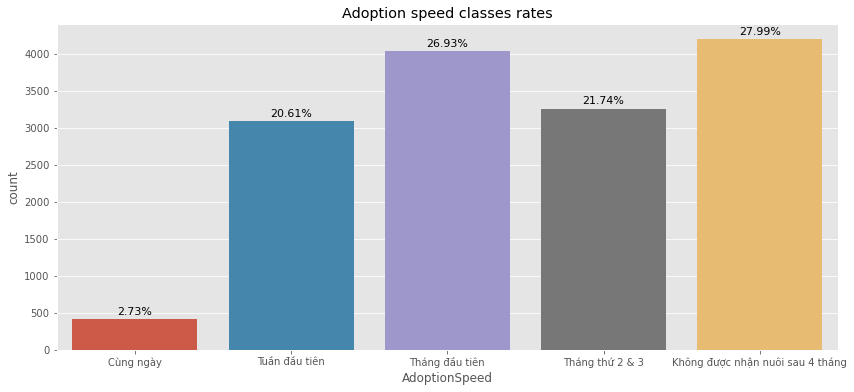

In [53]:
# AdoptionSpeed
plt.figure(figsize=(14, 6));
g = sns.countplot(x='AdoptionSpeed', data=Pet_df)
plt.title('Adoption speed classes rates');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 8),
         textcoords='offset points')  
ax=ax.set_xticklabels(['Cùng ngày', 'Tuần đầu tiên','Tháng đầu tiên','Tháng thứ 2 & 3','Không được nhận nuôi sau 4 tháng'])

In [48]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [50]:
from nltk.corpus import stopwords

**NHỮNG TÊN ĐƯỢC YÊU THÍCH NHẤT*

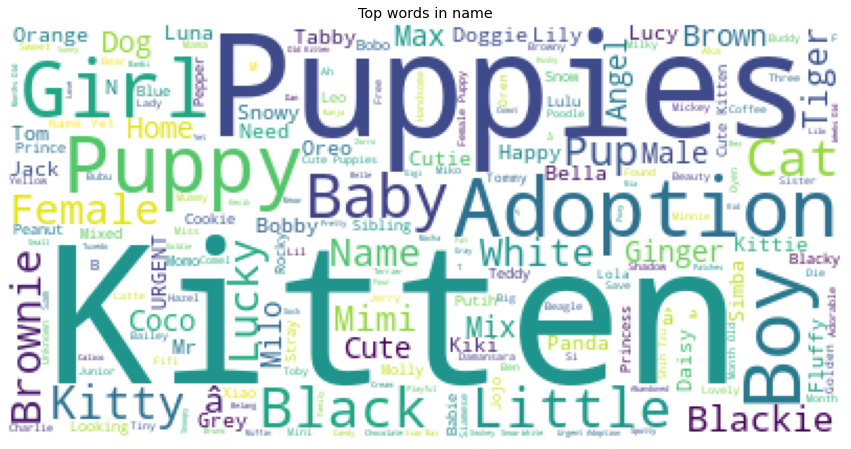

In [54]:
Pet_df['Name']=Pet_df['Name'].fillna('').values
fig, ax = plt.subplots(figsize = (15, 15))
Description = ' '.join(Pet_df['Name'])
wordcloud = WordCloud(max_font_size=None, background_color='white').generate(Description)
plt.axis("off");
plt.imshow(wordcloud)
plt.title('Top words in name');

**NHỮNG TỪ MÔ TẢ XUẤT HIỆN NHIỀU NHẤT**
Những từ xuất hiện phổ biến: Cat, Dog, Love, Kitten, Found Adoption, Will.

- *Phân tích thêm ý nghĩa của những cụm từ này!!! Tương tự với phần trên!*

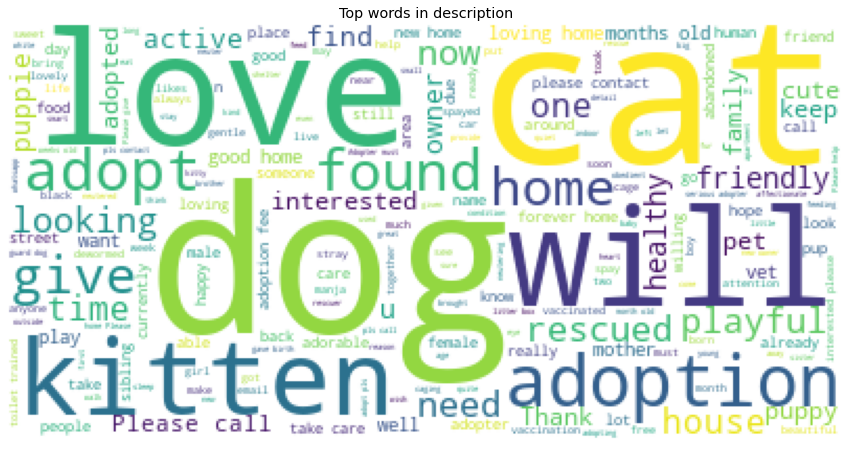

In [52]:
Pet_df['Description']=Pet_df['Description'].fillna('').values
fig, ax = plt.subplots(figsize = (15, 15))
Description = ' '.join(Pet_df['Description'])
wordcloud = WordCloud(max_font_size=None, background_color='white').generate(Description)
plt.axis("off");
plt.imshow(wordcloud)
plt.title('Top words in description');